In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import geopandas as gpd

In [2]:
#read the top_200_africa.csv file
df = pd.read_csv('data/top_200_africa.csv')

In [3]:
df

,tag,name,nameColor,icon,trophies,rank,club,country_code
0,#VLJ902YC,NR | SNOW,0xfff9c908,{'id': 28000610},84343,1,{'name': 'Assemble'},DZ
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,0xffffffff,{'id': 28000345},82174,2,{'name': 'BS ACADEMY'},DZ
2,#9CL9YVJ89,T4B_RONALDO,0xfff9c908,{'id': 28000129},80972,3,{'name': 'French United'},DZ
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,0xfff05637,{'id': 28000539},80837,4,NaN,DZ
4,#2RRP20PCC,hamza zabat,0xffa8e132,{'id': 28000402},77537,5,{'name': 'Royal Gaming'},DZ
...,...,...,...,...,...,...,...,...
10795,#9R9LRL9LP,Killerka01,0xffffffff,{'id': 28000187},54568,196,{'name': 'Axyel'},ZW
10796,#Y99GYCGG8,RelaxoPlayer,0xffcb5aff,{'id': 28000135},54566,197,{'name': 'Mutterlos'},ZW
10797,#2R9JP9PJJ,deadpool,0xfff05637,{'id': 28000500},54564,198,{'name': '✨BRAWLSILEIROS✨'},ZW
10798,#9G0JCCVUU,Ayato🤍ケング,0xffffffff,{'id': 28000139},54512,199,{'name': '「°hazakuro°🎀」'},ZW


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tag           10800 non-null  object
 1   name          10800 non-null  object
 2   nameColor     10800 non-null  object
 3   icon          10800 non-null  object
 4   trophies      10800 non-null  int64 
 5   rank          10800 non-null  int64 
 6   club          9820 non-null   object
 7   country_code  10600 non-null  object
dtypes: int64(2), object(6)
memory usage: 675.1+ KB


In [6]:
#show values where country_code is not available
df[df['country_code'].isnull()]

,tag,name,nameColor,icon,trophies,rank,club,country_code
7200,#2PV99V890,BibouあZマケ🧸,0xff1ba5f5,{'id': 28000510},73839,1,NaN,NaN
7201,#9RUGLGC0P,🌸Ɍʘ͖͢ͲA͛🇨🇵,0xfff9c908,{'id': 28000534},68669,2,{'name': '⭐New York⭐'},NaN
7202,#8UYG8JUL0,BC* Mqa🩸,0xffffffff,{'id': 28000452},67152,3,{'name': 'A Few TTM Men'},NaN
7203,#2G9QG2LYJ,Navi|𝑌𝔯𝔬x🖤,0xff4ddba2,{'id': 28000132},66290,4,{'name': 'Bs Olympique'},NaN
7204,#P8LL222UV,tt manigance,0xfff05637,{'id': 28000037},66183,5,NaN,NaN
...,...,...,...,...,...,...,...,...
7395,#8QYVCGQ2Q,El_Slays,0xffa8e132,{'id': 28000399},42584,196,{'name': 'les 3 célestes'},NaN
7396,#GLCYYY8U,ordzy,0xff1ba5f5,{'id': 28000508},42578,197,{'name': 'AK Frost'},NaN
7397,#YR20VGVVC,Marley🐧,0xff1ba5f5,{'id': 28000313},42575,198,{'name': 'Penguins'},NaN
7398,#2V08GJRPV,◤ᵀᵒˣⁱᶜ°ɴ͢͢『£𐍉,0xfff9c908,{'id': 28000443},42544,199,{'name': 'terry.QLF'},NaN


In [7]:
# Cell generated by Data Wrangler

def clean_rankings(df):
    # Drop column: 'icon'
    df = df.drop(columns=['icon'])
    # Change column type to string for column: 'club'
    df = df.astype({'club': 'string'})
    # Function to extract club name from the dictionary-like string
    def extract_club_name(club):
        if pd.isna(club):
            return club  # Keep NaN values as they are
        try:
            # Convert the string to a dictionary and return the 'name' value
            return eval(club).get('name')
        except:
            return club  # Return the original value if there's an error
    # Apply the function to the "club" column
    df['club'] = df['club'].apply(extract_club_name)
    # Replace missing values with "None" in column: 'club'
    df = df.fillna({'club': "N/A"})
    # Drop column: 'nameColor'
    df = df.drop(columns=['nameColor'])
    country_mapping = {
        'DZ': 'Algeria', 'AO': 'Angola', 'BJ': 'Benin', 'BW': 'Botswana', 'BF': 'Burkina Faso',
        'BI': 'Burundi', 'CV': 'Cape Verde', 'CM': 'Cameroon', 'CF': 'Central African Republic',
        'TD': 'Chad', 'KM': 'Comoros', 'CD': 'Democratic Republic of the Congo', 'CG': 'Republic of the Congo',
        'CI': 'Ivory Coast', 'DJ': 'Djibouti', 'EG': 'Egypt', 'GQ': 'Equatorial Guinea', 'ER': 'Eritrea',
        'SZ': 'Eswatini', 'ET': 'Ethiopia', 'GA': 'Gabon', 'GM': 'Gambia', 'GH': 'Ghana', 'GN': 'Guinea',
        'GW': 'Guinea-Bissau', 'KE': 'Kenya', 'LS': 'Lesotho', 'LR': 'Liberia', 'LY': 'Libya',
        'MG': 'Madagascar', 'MW': 'Malawi', 'ML': 'Mali', 'MR': 'Mauritania', 'MU': 'Mauritius',
        'MA': 'Morocco', 'MZ': 'Mozambique', 'NA': 'Namibia', 'NE': 'Niger', 'NG': 'Nigeria',
        'RW': 'Rwanda', 'ST': 'Sao Tome and Principe', 'SN': 'Senegal', 'SC': 'Seychelles',
        'SL': 'Sierra Leone', 'SO': 'Somalia', 'ZA': 'South Africa', 'SS': 'South Sudan',
        'SD': 'Sudan', 'TZ': 'Tanzania', 'TG': 'Togo', 'TN': 'Tunisia', 'UG': 'Uganda', 'ZM': 'Zambia', 'ZW': 'Zimbabwe'
    }
    # Replace the country codes with country names
    df['country_code'] = df['country_code'].replace(country_mapping)
    # Optionally, you can rename the column if you want
    df.rename(columns={'country_code': 'country'}, inplace=True)
    return df

# Loaded variable 'df' from URI: c:\Users\mubia\OneDrive\Documents\Brawl Stars\data\top_200_africa.csv

df = clean_rankings(df)
df.head()

,tag,name,trophies,rank,club,country
0,#VLJ902YC,NR | SNOW,84343,1,Assemble,Algeria
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,82174,2,BS ACADEMY,Algeria
2,#9CL9YVJ89,T4B_RONALDO,80972,3,French United,Algeria
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,80837,4,N/A,Algeria
4,#2RRP20PCC,hamza zabat,77537,5,Royal Gaming,Algeria


In [8]:
#replace missing values in country column with Namibia
df['country'] = df['country'].fillna('Namibia')

In [9]:
#check for missing values,,.                          
df.isnull().sum()

tag         0
name        0
trophies    0
rank        0
club        0
country     0
dtype: int64

In [10]:
df.shape

(10800, 6)

In [13]:
#export the data to a new csv file called top_200_africa_cleaned.csv
df.to_csv('data/top_200_africa_cleaned.csv', index=False)

In [11]:
df_2 = pd.read_csv('data/brawl_stars_player_data_no_brawlers.csv')

In [12]:
df_2.head()

,tag,name,nameColor,icon,trophies,highestTrophies,expLevel,expPoints,isQualifiedFromChampionshipChallenge,3vs3Victories,soloVictories,duoVictories,bestRoboRumbleTime,bestTimeAsBigBrawler,club
0,#VLJ902YC,NR | SNOW,0xfff9c908,{'id': 28000610},84808,84819,331,557314,False,18705,7079,3311,5,0,"{'tag': '#Q920J8PU', 'name': 'Assemble'}"
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,0xffffffff,{'id': 28000345},82174,82235,390,772747,False,53664,1030,1778,12,0,"{'tag': '#2CLQG0JVP', 'name': 'BS ACADEMY'}"
2,#9CL9YVJ89,T4B_RONALDO,0xfff9c908,{'id': 28000129},81021,81039,345,604810,False,30072,2514,4683,6,0,"{'tag': '#2VLGQG8YG', 'name': 'French United'}"
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,0xfff05637,{'id': 28000539},80861,80916,354,638594,False,33398,6415,6587,9,0,{}
4,#2RRP20PCC,hamza zabat,0xffa8e132,{'id': 28000402},77537,77675,331,556197,False,8837,8638,4478,7,0,"{'tag': '#2V9UC9VGC', 'name': 'Royal Gaming'}"


In [15]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df_2):
    # Define a function to extract tag and name
    def extract_tag_name(club_info):
        try:
            data_dict = ast.literal_eval(club_info)
            tag = data_dict.get('tag', None)
            name = data_dict.get('name', None)
            return pd.Series([tag, name])
        except (ValueError, SyntaxError):
            return pd.Series([None, None])
    # Apply the function to the 'club' column and create new columns
    df_2[['club_tag', 'club_name']] = df_2['club'].apply(extract_tag_name)
    # Drop column: 'club'
    df_2 = df_2.drop(columns=['club'])
    # Replace missing values with "N/A" in column: 'club_tag'
    df_2 = df_2.fillna({'club_tag': "N/A"})
    # Replace missing values with "N/A" in column: 'club_name'
    df_2 = df_2.fillna({'club_name': "N/A"})
    # Drop column: 'nameColor'
    df_2 = df_2.drop(columns=['nameColor'])
    # Drop column: 'icon'
    df_2 = df_2.drop(columns=['icon'])
    return df_2

df_2 = clean_data(df_2)
df_2.head()

,tag,name,trophies,highestTrophies,expLevel,expPoints,isQualifiedFromChampionshipChallenge,3vs3Victories,soloVictories,duoVictories,bestRoboRumbleTime,bestTimeAsBigBrawler,club_tag,club_name
0,#VLJ902YC,NR | SNOW,84808,84819,331,557314,False,18705,7079,3311,5,0,#Q920J8PU,Assemble
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,82174,82235,390,772747,False,53664,1030,1778,12,0,#2CLQG0JVP,BS ACADEMY
2,#9CL9YVJ89,T4B_RONALDO,81021,81039,345,604810,False,30072,2514,4683,6,0,#2VLGQG8YG,French United
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,80861,80916,354,638594,False,33398,6415,6587,9,0,N/A,N/A
4,#2RRP20PCC,hamza zabat,77537,77675,331,556197,False,8837,8638,4478,7,0,#2V9UC9VGC,Royal Gaming


In [16]:
#export the data to a new csv file called player_data_cleaned.csv
df_2.to_csv('data/player_data_cleaned.csv', index=False)

In [17]:
#merge the two dataframes
df_complete = pd.merge(df, df_2, on='tag', how='inner')

In [16]:
df_complete.head()

,tag,name_x,trophies_x,rank,club,country,name_y,trophies_y,highestTrophies,expLevel,expPoints,isQualifiedFromChampionshipChallenge,3vs3Victories,soloVictories,duoVictories,bestRoboRumbleTime
0,#VLJ902YC,NR | SNOW,84343,1,Assemble,Algeria,NR | SNOW,84808,84819,331,557314,False,18705,7079,3311,5
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,82174,2,BS ACADEMY,Algeria,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,82174,82235,390,772747,False,53664,1030,1778,12
2,#9CL9YVJ89,T4B_RONALDO,80972,3,French United,Algeria,T4B_RONALDO,81021,81039,345,604810,False,30072,2514,4683,6
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,80837,4,N/A,Algeria,🔥BスRへOイDルY🔥,80861,80916,354,638594,False,33398,6415,6587,9
4,#2RRP20PCC,hamza zabat,77537,5,Royal Gaming,Algeria,hamza zabat,77537,77675,331,556197,False,8837,8638,4478,7


In [18]:
"""
Cell generated by Data Wrangler.
"""
def final_touches(df_complete):
    # Drop column: 'name_y'
    df_complete = df_complete.drop(columns=['name_y'])
    # Rename column 'name_x' to 'name'
    df_complete = df_complete.rename(columns={'name_x': 'name'})
    # Drop column: 'trophies_x'
    df_complete = df_complete.drop(columns=['trophies_x'])
    # Rename column 'trophies_y' to 'trophies'
    df_complete = df_complete.rename(columns={'trophies_y': 'trophies'})
    # Drop column: 'club'
    df_complete = df_complete.drop(columns=['club'])
    # Drop column: 'bestTimeAsBigBrawler'
    df_complete = df_complete.drop(columns=['bestTimeAsBigBrawler'])
    return df_complete

df_complete = final_touches(df_complete)
df_complete.head()

,tag,name,rank,country,trophies,highestTrophies,expLevel,expPoints,isQualifiedFromChampionshipChallenge,3vs3Victories,soloVictories,duoVictories,bestRoboRumbleTime,club_tag,club_name
0,#VLJ902YC,NR | SNOW,1,Algeria,84808,84819,331,557314,False,18705,7079,3311,5,#Q920J8PU,Assemble
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,2,Algeria,82174,82235,390,772747,False,53664,1030,1778,12,#2CLQG0JVP,BS ACADEMY
2,#9CL9YVJ89,T4B_RONALDO,3,Algeria,81021,81039,345,604810,False,30072,2514,4683,6,#2VLGQG8YG,French United
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,4,Algeria,80861,80916,354,638594,False,33398,6415,6587,9,N/A,N/A
4,#2RRP20PCC,hamza zabat,5,Algeria,77537,77675,331,556197,False,8837,8638,4478,7,#2V9UC9VGC,Royal Gaming


In [19]:
#export the data to a new csv file called complete_data.csv
df_complete.to_csv('data/complete_data.csv', index=False)

In [20]:
df_complete.columns

Index(['tag', 'name', 'rank', 'country', 'trophies', 'highestTrophies',
       'expLevel', 'expPoints', 'isQualifiedFromChampionshipChallenge',
       '3vs3Victories', 'soloVictories', 'duoVictories', 'bestRoboRumbleTime',
       'club_tag', 'club_name'],
      dtype='object')

In [2]:
playerstats = pd.read_csv('data/playerstats_table - complete_data_renamed.csv')

In [13]:
#check for unique countries
playerstats['country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Democratic Republic of the Congo',
       'Republic of the Congo', 'Ivory Coast', 'Djibouti', 'Egypt',
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [14]:
#check number of unique countries
playerstats['country'].nunique()

54

In [3]:
#load the complete_data_renamed.csv file
complete= pd.read_csv('data/complete_data_renamed.csv')

In [3]:
complete.head()

,player_tag,player_name,rank,country,trophies,highest_trophies,exp_level,exp_points,isQualifiedFromChampionshipChallenge,3vs3_victories,solo_victories,duo_victories,bestRoboRumbleTime,club_tag,club_name
0,#VLJ902YC,NR | SNOW,1,Algeria,84808,84819,331,557314,False,18705,7079,3311,5,#Q920J8PU,Assemble
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,2,Algeria,82174,82235,390,772747,False,53664,1030,1778,12,#2CLQG0JVP,BS ACADEMY
2,#9CL9YVJ89,T4B_RONALDO,3,Algeria,81021,81039,345,604810,False,30072,2514,4683,6,#2VLGQG8YG,French United
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,4,Algeria,80861,80916,354,638594,False,33398,6415,6587,9,NaN,NaN
4,#2RRP20PCC,hamza zabat,5,Algeria,77537,77675,331,556197,False,8837,8638,4478,7,#2V9UC9VGC,Royal Gaming


In [4]:
#check for missing values
complete.isnull().sum()

player_tag                                0
player_name                               0
rank                                      0
country                                   0
trophies                                  0
highest_trophies                          0
exp_level                                 0
exp_points                                0
isQualifiedFromChampionshipChallenge      0
3vs3_victories                            0
solo_victories                            0
duo_victories                             0
bestRoboRumbleTime                        0
club_tag                                911
club_name                               911
dtype: int64

In [4]:
#replace missing values with No club 
complete['club_name'] = complete['club_name'].fillna('No Club')
complete['club_tag'] = complete['club_tag'].fillna('No Club')

In [5]:
#check for missing values
complete.isnull().sum()

player_tag                              0
player_name                             0
rank                                    0
country                                 0
trophies                                0
highest_trophies                        0
exp_level                               0
exp_points                              0
isQualifiedFromChampionshipChallenge    0
3vs3_victories                          0
solo_victories                          0
duo_victories                           0
bestRoboRumbleTime                      0
club_tag                                0
club_name                               0
dtype: int64

In [6]:
#read african_countries.geojson file
africa = gpd.read_file('data/african_countries.geojson')

In [8]:
africa.head()

,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,geometry
0,37.296205,18.968147,11.997337,-8.668908,77146891,relation,192756,28.000027,2.999983,boundary,administrative,4,0.800985,country,Algeria,Algeria,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
1,-4.345801,-18.039381,24.087636,11.460979,65579527,relation,195267,-11.877577,17.569124,boundary,administrative,4,0.750270,country,Angola,Angola,"MULTIPOLYGON (((11.46098 -16.55432, 11.46274 -..."
2,12.409203,6.039870,3.845145,0.776667,67143494,relation,192784,9.529347,2.258441,boundary,administrative,4,0.667613,country,Benin,Benin,"POLYGON ((0.77667 10.37667, 0.79220 10.36589, ..."
3,-17.778137,-26.907007,29.373887,19.998649,60971181,relation,1889339,-23.168178,24.592874,boundary,administrative,4,0.716335,country,Botswana,Botswana,"POLYGON ((19.99865 -24.09709, 19.99913 -24.360..."
4,15.084004,9.410472,2.408972,-5.513207,289077872,relation,192783,12.075308,-1.688031,boundary,administrative,4,0.729269,country,Burkina Faso,Burkina Faso,"POLYGON ((-5.51321 10.43079, -5.51319 10.43066..."


In [7]:
#subset the data to only include name, importance and geometry columns
africa = africa[['name', 'importance', 'geometry']]
africa.head()

,name,importance,geometry
0,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
1,Angola,0.750270,"MULTIPOLYGON (((11.46098 -16.55432, 11.46274 -..."
2,Benin,0.667613,"POLYGON ((0.77667 10.37667, 0.79220 10.36589, ..."
3,Botswana,0.716335,"POLYGON ((19.99865 -24.09709, 19.99913 -24.360..."
4,Burkina Faso,0.729269,"POLYGON ((-5.51321 10.43079, -5.51319 10.43066..."


<Axes: >

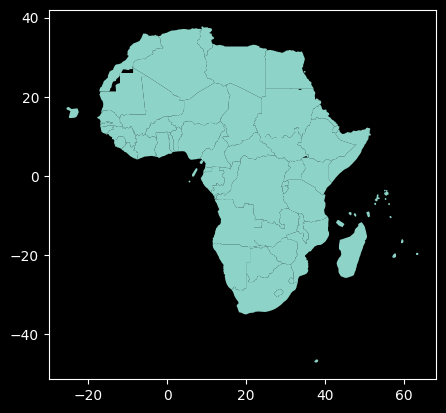

In [10]:
africa.plot()

In [25]:
list_1= complete['country'].unique().tolist()

In [26]:
list_2= africa['name'].unique().tolist()

In [27]:
#are the two lists the same
set(list_1).issubset(list_2)

False

In [29]:
#print list 1
print(list_1)

['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Ivory Coast', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']


In [30]:
list_2

['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cape Verde',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Democratic Republic of the Congo',
 'Congo-Brazzaville',
 "Côte d'Ivoire",
 'Djibouti',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Gabon',
 'The Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'São Tomé and Príncipe',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zimbabwe']

In [8]:
# List A (old values)
list_A = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon',
    'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Congo-Brazzaville',
    "Côte d'Ivoire", 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
    'The Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
    'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
    'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

# List B (new values)
list_B = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon',
    'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo',
    'Ivory Coast', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
    'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
    'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
    'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
    'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

# Create a mapping dictionary
mapping_dict = dict(zip(list_A, list_B))

# Replace the values in list_A using the mapping dictionary
renamed_list = [mapping_dict[country] for country in list_A]

# Print the renamed list
print(renamed_list)

['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Ivory Coast', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']


In [9]:
#make the renamed list the name column of africa
africa['name'] = africa['name'].replace(mapping_dict)

In [10]:
#enrich the complete data with the african countries data
complete_enriched = pd.merge(complete, africa, left_on='country', right_on='name', how='left')

In [14]:
complete_enriched.head()

,player_tag,player_name,rank,country,trophies,highest_trophies,exp_level,exp_points,isQualifiedFromChampionshipChallenge,3vs3_victories,solo_victories,duo_victories,bestRoboRumbleTime,club_tag,club_name,name,importance,geometry
0,#VLJ902YC,NR | SNOW,1,Algeria,84808,84819,331,557314,False,18705,7079,3311,5,#Q920J8PU,Assemble,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,2,Algeria,82174,82235,390,772747,False,53664,1030,1778,12,#2CLQG0JVP,BS ACADEMY,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
2,#9CL9YVJ89,T4B_RONALDO,3,Algeria,81021,81039,345,604810,False,30072,2514,4683,6,#2VLGQG8YG,French United,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,4,Algeria,80861,80916,354,638594,False,33398,6415,6587,9,No Club,No Club,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
4,#2RRP20PCC,hamza zabat,5,Algeria,77537,77675,331,556197,False,8837,8638,4478,7,#2V9UC9VGC,Royal Gaming,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."


In [11]:
# Create a dictionary to map countries to their regions
region_dict = {
    "Algeria": "North Africa",
    "Angola": "Southern Africa",
    "Benin": "West Africa",
    "Botswana": "Southern Africa",
    "Burkina Faso": "West Africa",
    "Burundi": "East Africa",
    "Cape Verde": "West Africa",
    "Cameroon": "Central Africa",
    "Central African Republic": "Central Africa",
    "Chad": "Central Africa",
    "Comoros": "East Africa",
    "Democratic Republic of the Congo": "Central Africa",
    "Republic of the Congo": "Central Africa",
    "Ivory Coast": "West Africa",
    "Djibouti": "East Africa",
    "Egypt": "North Africa",
    "Equatorial Guinea": "Central Africa",
    "Eritrea": "East Africa",
    "Eswatini": "Southern Africa",
    "Ethiopia": "East Africa",
    "Gabon": "Central Africa",
    "Gambia": "West Africa",
    "Ghana": "West Africa",
    "Guinea": "West Africa",
    "Guinea-Bissau": "West Africa",
    "Kenya": "East Africa",
    "Lesotho": "Southern Africa",
    "Liberia": "West Africa",
    "Libya": "North Africa",
    "Madagascar": "Southern Africa",
    "Malawi": "Southern Africa",
    "Mali": "West Africa",
    "Mauritania": "West Africa",
    "Mauritius": "Southern Africa",
    "Morocco": "North Africa",
    "Mozambique": "Southern Africa",
    "Namibia": "Southern Africa",
    "Niger": "West Africa",
    "Nigeria": "West Africa",
    "Rwanda": "East Africa",
    "Sao Tome and Principe": "Central Africa",
    "Senegal": "West Africa",
    "Seychelles": "East Africa",
    "Sierra Leone": "West Africa",
    "Somalia": "East Africa",
    "South Africa": "Southern Africa",
    "South Sudan": "East Africa",
    "Sudan": "East Africa",
    "Tanzania": "East Africa",
    "Togo": "West Africa",
    "Tunisia": "North Africa",
    "Uganda": "East Africa",
    "Zambia": "Southern Africa",
    "Zimbabwe": "Southern Africa"
}

# Assuming your DataFrame is named 'playerstats' and the country column is 'country'
complete_enriched['region'] = playerstats['country'].map(region_dict)

In [18]:
complete_enriched.head()

,player_tag,player_name,rank,country,trophies,highest_trophies,exp_level,exp_points,isQualifiedFromChampionshipChallenge,3vs3_victories,solo_victories,duo_victories,bestRoboRumbleTime,club_tag,club_name,name,importance,geometry,region
0,#VLJ902YC,NR | SNOW,1,Algeria,84808,84819,331,557314,False,18705,7079,3311,5,#Q920J8PU,Assemble,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247...",North Africa
1,#RJG2QY89,𝕭𝖑𝖆𝖓𝖈𝖔迅雷,2,Algeria,82174,82235,390,772747,False,53664,1030,1778,12,#2CLQG0JVP,BS ACADEMY,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247...",North Africa
2,#9CL9YVJ89,T4B_RONALDO,3,Algeria,81021,81039,345,604810,False,30072,2514,4683,6,#2VLGQG8YG,French United,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247...",North Africa
3,#2QVYVP8U8,🔥BスRへOイDルY🔥,4,Algeria,80861,80916,354,638594,False,33398,6415,6587,9,No Club,No Club,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247...",North Africa
4,#2RRP20PCC,hamza zabat,5,Algeria,77537,77675,331,556197,False,8837,8638,4478,7,#2V9UC9VGC,Royal Gaming,Algeria,0.800985,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247...",North Africa


In [12]:
complete_enriched['region'].unique()

array(['North Africa', 'Southern Africa', 'West Africa', 'East Africa',
       'Central Africa'], dtype=object)

In [42]:
#group by region and sum the trophies
region_trophies = complete_enriched.groupby('region')['trophies'].sum().reset_index()
region_trophies

,region,trophies
0,Central Africa,79517498
1,East Africa,129338743
2,North Africa,64121619
3,Southern Africa,124068092
4,West Africa,161935174


In [15]:
#check for missing values
complete_enriched.isnull().sum()

player_tag                              0
player_name                             0
rank                                    0
country                                 0
trophies                                0
highest_trophies                        0
exp_level                               0
exp_points                              0
isQualifiedFromChampionshipChallenge    0
3vs3_victories                          0
solo_victories                          0
duo_victories                           0
bestRoboRumbleTime                      0
club_tag                                0
club_name                               0
name                                    0
importance                              0
geometry                                0
region                                  0
dtype: int64

In [16]:
# Convert the merged DataFrame to a GeoDataFrame
complete_enriched_gdf = gpd.GeoDataFrame(complete_enriched, geometry='geometry')

In [17]:
#drop geometry column
complete_enriched_gdf = complete_enriched_gdf.drop(columns=['geometry'])

In [18]:
#Group by country and aggregate for mean trophies
grouped_country = complete_enriched_gdf.groupby('country').agg({
    'trophies': 'mean',
    '3vs3_victories': 'mean',
    'solo_victories': 'mean',
    'duo_victories': 'mean',
    'exp_points': 'mean',
    'exp_level': 'mean',
    'bestRoboRumbleTime': 'mean'
}).reset_index()


In [20]:
#convert the grouped_country to a dataframe
grouped_country = pd.DataFrame(grouped_country)

In [ ]:
grouped_country

In [24]:
"""
Cell generated by Data Wrangler.
"""
def preprocess_data(grouped_country):
    # Rename column 'trophies' to 'avg_trophies'
    grouped_country = grouped_country.rename(columns={'trophies': 'avg_trophies'})
    # Rename column '3vs3_victories' to 'avg_3vs3_victories'
    grouped_country = grouped_country.rename(columns={'3vs3_victories': 'avg_3vs3_victories'})
    # Rename column 'solo_victories' to 'avg_solo_victories'
    grouped_country = grouped_country.rename(columns={'solo_victories': 'avg_solo_victories'})
    # Rename column 'duo_victories' to 'avg_duo_victories'
    grouped_country = grouped_country.rename(columns={'duo_victories': 'avg_duo_victories'})
    # Rename column 'exp_points' to 'avg_exp_points'
    grouped_country = grouped_country.rename(columns={'exp_points': 'avg_exp_points'})
    # Rename column 'exp_level' to 'avg_exp_level'
    grouped_country = grouped_country.rename(columns={'exp_level': 'avg_exp_level'})
    # Rename column 'bestRoboRumbleTime' to 'avg_bestRoboRumbleTime'
    grouped_country = grouped_country.rename(columns={'bestRoboRumbleTime': 'avg_bestRoboRumbleTime'})
    # Round column 'avg_exp_level' (Number of decimals: 0)
    grouped_country = grouped_country.round({'avg_exp_level': 0})
    # Round column 'avg_exp_points' (Number of decimals: 0)
    grouped_country = grouped_country.round({'avg_exp_points': 0})
    # Round column 'avg_duo_victories' (Number of decimals: 0)
    grouped_country = grouped_country.round({'avg_duo_victories': 0})
    # Round column 'avg_solo_victories' (Number of decimals: 0)
    grouped_country = grouped_country.round({'avg_solo_victories': 0})
    # Round column 'avg_3vs3_victories' (Number of decimals: 0)
    grouped_country = grouped_country.round({'avg_3vs3_victories': 0})
    # Round column 'avg_trophies' (Number of decimals: 0)
    grouped_country = grouped_country.round({'avg_trophies': 0})
    return grouped_country

grouped_country = preprocess_data(grouped_country)
grouped_country.head()

,country,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime
0,Algeria,66810.0,20650.0,3552.0,3179.0,504384.0,311.0,8.255
1,Angola,56660.0,11969.0,2549.0,2610.0,339500.0,254.0,7.785
2,Benin,49951.0,9772.0,2144.0,2197.0,286585.0,233.0,7.100
3,Botswana,48321.0,9811.0,1933.0,1940.0,265998.0,224.0,7.000
4,Burkina Faso,51250.0,10532.0,2041.0,2175.0,287943.0,233.0,7.060


In [21]:
#do the same grouping but with sum aggregation
grouped_country_sum = complete_enriched_gdf.groupby('country').agg({
    'trophies': 'sum',
    '3vs3_victories': 'sum',
    'solo_victories': 'sum',
    'duo_victories': 'sum',
    'exp_points': 'sum'
}).reset_index()

In [22]:
grouped_country_sum

,country,trophies,3vs3_victories,solo_victories,duo_victories,exp_points
0,Algeria,13362052,4130058,710483,635878,100876814
1,Angola,11331933,2393762,509710,522026,67899989
2,Benin,9990230,1954377,428847,439375,57317023
3,Botswana,9664207,1962231,386617,388033,53199593
4,Burkina Faso,10249935,2106493,408234,434998,57588647
5,Burundi,10281766,1955267,403219,471821,55575617
6,Cameroon,10157092,2562918,384603,454977,64858467
7,Cape Verde,10539513,2286233,446123,436393,61229684
8,Central African Republic,9897840,1818526,394115,401634,52041389
9,Chad,10312632,2051043,418903,444420,57581357


In [25]:
"""
Cell generated by Data Wrangler.
"""
def preprocess_data_2(grouped_country_sum):
    # Rename column 'trophies' to 'total_trophies'
    grouped_country_sum = grouped_country_sum.rename(columns={'trophies': 'total_trophies'})
    # Rename column '3vs3_victories' to 'total_3vs3_victories'
    grouped_country_sum = grouped_country_sum.rename(columns={'3vs3_victories': 'total_3vs3_victories'})
    # Rename column 'solo_victories' to 'total_solo_victories'
    grouped_country_sum = grouped_country_sum.rename(columns={'solo_victories': 'total_solo_victories'})
    # Rename column 'duo_victories' to 'total_duo_victories'
    grouped_country_sum = grouped_country_sum.rename(columns={'duo_victories': 'total_duo_victories'})
    # Rename column 'exp_points' to 'total_exp_points'
    grouped_country_sum = grouped_country_sum.rename(columns={'exp_points': 'total_exp_points'})
    return grouped_country_sum

grouped_country_sum = preprocess_data_2(grouped_country_sum)
grouped_country_sum.head()

,country,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points
0,Algeria,13362052,4130058,710483,635878,100876814
1,Angola,11331933,2393762,509710,522026,67899989
2,Benin,9990230,1954377,428847,439375,57317023
3,Botswana,9664207,1962231,386617,388033,53199593
4,Burkina Faso,10249935,2106493,408234,434998,57588647


In [23]:
#convert the grouped_country_sum to a dataframe
grouped_country_sum = pd.DataFrame(grouped_country_sum)

In [26]:
#join the two dataframes on the country column
final_grouped = pd.merge(grouped_country, grouped_country_sum, on='country', how='inner')

In [27]:
final_grouped.head()

,country,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points
0,Algeria,66810.0,20650.0,3552.0,3179.0,504384.0,311.0,8.255,13362052,4130058,710483,635878,100876814
1,Angola,56660.0,11969.0,2549.0,2610.0,339500.0,254.0,7.785,11331933,2393762,509710,522026,67899989
2,Benin,49951.0,9772.0,2144.0,2197.0,286585.0,233.0,7.100,9990230,1954377,428847,439375,57317023
3,Botswana,48321.0,9811.0,1933.0,1940.0,265998.0,224.0,7.000,9664207,1962231,386617,388033,53199593
4,Burkina Faso,51250.0,10532.0,2041.0,2175.0,287943.0,233.0,7.060,10249935,2106493,408234,434998,57588647


In [28]:
#load final_africa geojson file
final_africa = gpd.read_file('data/final_africa.geojson')

In [29]:
final_africa.head()

,country,importance,region,geometry
0,Algeria,0.800985,North Africa,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
1,Angola,0.750270,Southern Africa,"MULTIPOLYGON (((11.46098 -16.55432, 11.46274 -..."
2,Benin,0.667613,West Africa,"POLYGON ((0.77667 10.37667, 0.79220 10.36589, ..."
3,Botswana,0.716335,Southern Africa,"POLYGON ((19.99865 -24.09709, 19.99913 -24.360..."
4,Burkina Faso,0.729269,West Africa,"POLYGON ((-5.51321 10.43079, -5.51319 10.43066..."


In [30]:
#join the final_grouped dataframe with the final_africa geodataframe, name it finalized_collection
finalized_collection = pd.merge(final_grouped, final_africa, on='country', how='inner')

In [31]:
finalized_collection.head()

,country,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points,importance,region,geometry
0,Algeria,66810.0,20650.0,3552.0,3179.0,504384.0,311.0,8.255,13362052,4130058,710483,635878,100876814,0.800985,North Africa,"POLYGON ((-8.66891 28.24094, -8.66884 28.21247..."
1,Angola,56660.0,11969.0,2549.0,2610.0,339500.0,254.0,7.785,11331933,2393762,509710,522026,67899989,0.750270,Southern Africa,"MULTIPOLYGON (((11.46098 -16.55432, 11.46274 -..."
2,Benin,49951.0,9772.0,2144.0,2197.0,286585.0,233.0,7.100,9990230,1954377,428847,439375,57317023,0.667613,West Africa,"POLYGON ((0.77667 10.37667, 0.79220 10.36589, ..."
3,Botswana,48321.0,9811.0,1933.0,1940.0,265998.0,224.0,7.000,9664207,1962231,386617,388033,53199593,0.716335,Southern Africa,"POLYGON ((19.99865 -24.09709, 19.99913 -24.360..."
4,Burkina Faso,51250.0,10532.0,2041.0,2175.0,287943.0,233.0,7.060,10249935,2106493,408234,434998,57588647,0.729269,West Africa,"POLYGON ((-5.51321 10.43079, -5.51319 10.43066..."


In [32]:
type(finalized_collection)

pandas.core.frame.DataFrame

In [33]:
#export the finalized_collection to csv
finalized_collection.to_csv('data/finalized_collection.csv', index=False)

In [39]:
#convert the finalized_collection to a geodataframe
finalized_collection_gdf = gpd.GeoDataFrame(finalized_collection, geometry='geometry')

In [40]:
#export the finalized_collection_gdf to a geojson file
finalized_collection_gdf.to_file('data/finalized_collection.geojson', driver='GeoJSON')

In [43]:
#whats the country with the minimum total trophies
finalized_collection[finalized_collection['total_trophies'] == finalized_collection['total_trophies'].min()]

,country,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points,importance,region,geometry
21,Guinea,45647.0,8237.0,1757.0,1751.0,234963.0,211.0,6.88,9129471,1647347,351357,350170,46992526,0.72035,West Africa,"POLYGON ((-15.56805 10.63138, -15.56796 10.599..."


In [44]:
#whats the minimum importance
finalized_collection[finalized_collection['importance'] == finalized_collection['importance'].min()]

,country,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points,importance,region,geometry
25,Lesotho,49799.0,8574.0,2100.0,2041.0,259615.0,222.0,7.0,9959761,1714756,420033,408150,51923057,0.6431,Southern Africa,"POLYGON ((27.01138 -29.64920, 27.01138 -29.649..."


In [45]:
#max importance
finalized_collection[finalized_collection['importance'] == finalized_collection['importance'].max()]

,country,avg_trophies,avg_3vs3_victories,avg_solo_victories,avg_duo_victories,avg_exp_points,avg_exp_level,avg_bestRoboRumbleTime,total_trophies,total_3vs3_victories,total_solo_victories,total_duo_victories,total_exp_points,importance,region,geometry
33,Morocco,67339.0,20900.0,3004.0,2781.0,468209.0,300.0,7.85,13467755,4179921,600870,556111,93641767,0.825387,North Africa,"POLYGON ((-17.24484 21.35213, -17.02917 21.341..."
